In [ ]:
Data Scaling
=> KNN
=> distance based

feature(columns) - scale

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x = data[['Glucose','Age']]
y = data.Outcome

In [4]:
x

,Glucose,Age
0,148,50
1,85,31
2,183,32
3,89,21
4,137,33
...,...,...
763,101,63
764,122,27
765,121,30
766,126,47


In [ ]:
(85,31)

(150,40)=? 
yeskaa lagi distance compute gareraa garnu parchaa, KNN lagayeraa

In [5]:
x.describe()

,Glucose,Age
count,768.000000,768.000000
mean,120.894531,33.240885
std,31.972618,11.760232
min,0.000000,21.000000
25%,99.000000,24.000000
50%,117.000000,29.000000
75%,140.250000,41.000000
max,199.000000,81.000000


In [ ]:
yehaa variable ko rangee chhuttaa chhuteei chhaa(scale farak farak chhaa)
yeutaa value ko range thulo arko ko sano vayesi thulo le dominant garchhaa
so scaling garchhau yesto case ma

for data scaling techniques.
1> MinMax scaler 
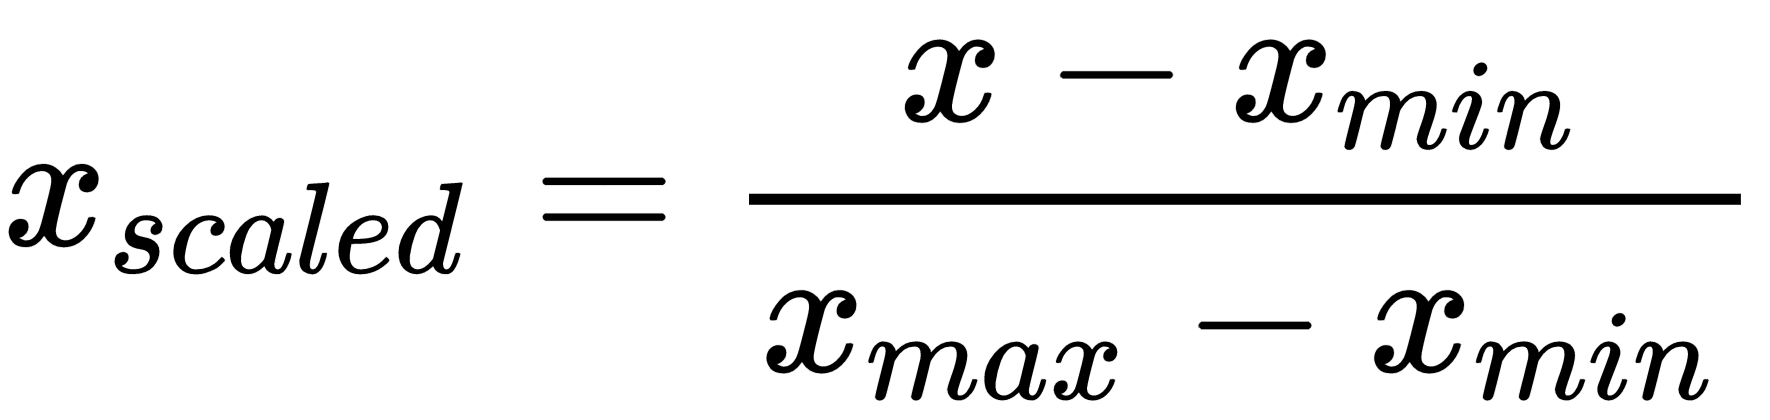!


for Standard scaler
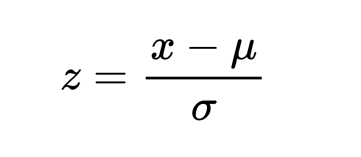

In [ ]:
mean =0 ,std =1

#Robust Scaling

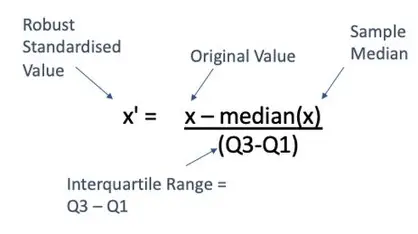!

In [ ]:
extreme values (high values pr low values ) chha bhaney robust scaling use hunchhaa

In [6]:
x.head()

,Glucose,Age
0,148,50
1,85,31
2,183,32
3,89,21
4,137,33


In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler
from sklearn.preprocessing import  StandardScaler #aahley lai yo matraa garda ni hunchhaa
from sklearn.model_selection import train_test_split

In [17]:
steps for scaling:
1> split data
2> train_data(fit_transform)
3> test_data(transform)

SyntaxError: invalid syntax (1229408221.py, line 1)

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2 , random_state = 14)

In [ ]:
y ko lagi scaling garnu pardeinna

In [20]:
xtrain.head()

,Glucose,Age
220,177,21
720,83,34
506,180,35
553,88,23
753,181,26


In [22]:


scaler = StandardScaler()
xtrain_s = scaler.fit_transform(xtrain)
xtest_s = scaler.transform(xtest)


In [ ]:
.fit_transform
.fit_ mean ,std
.transform => scaling

In [23]:
xtrain_s

array([[ 1.68398191, -1.03960266],
       [-1.18263658,  0.06225744],
       [ 1.77546974,  0.14701591],
       ...,
       [-0.6032137 , -1.03960266],
       [-0.81668529,  2.01170224],
       [-0.08478269, -0.78532725]], shape=(614, 2))

In [28]:
xtrains = pd.DataFrame(xtrain_s, columns = xtrain.columns)
xtrain.head()

,Glucose,Age
220,177,21
720,83,34
506,180,35
553,88,23
753,181,26


In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors = 7) #default value = 5
knn.fit(xtrain_s,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [27]:
yprediction = knn.predict(xtest_s)

In [ ]:
enassemble learning => more powerfull
random tree : dherei decison tree fit garchhaa

### Decision Trees

In [ ]:
=> Tree Structure
tree 2 otaa component ley banchha ie: 
  1> Node or vertex
  2> Line 

--kunei node ko child chhaina bhane ie called leaf node(external)
jasko child chhaa testo node lai internal node vanenchhaa.

--tree bata pani model banaunaa sakenchhaa
--yo aru vanda powerful chhaa 




In [ ]:
-- Linearly separable:
   2 ottaa class lai line le separate garnaa sakchha ki sakdainnaa.?
   if sakchhaa bahney linearly separable

-- linearly seperable vaye matra logistsic ko kaam garchha.
-- linearly separablle nahuney belaa ma logistic better hudenaa teti belaa decision tree
is better

In [ ]:
-- Tree structure

In [30]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [31]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
x = data.drop('species', axis =1)
y = data.species


In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state = 11)

In [35]:
dmodel = DecisionTreeClassifier() #decision tree ko model banako , dmodel=>object
dmodel.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
model banepachhi now predict,evalute garne

In [38]:
# for predictition
dmodel.predict(([[4,3.1,1,0.5]]))

C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [39]:
yprediction = dmodel.predict(xtest)

In [41]:
accuracy = accuracy_score(ytest,yprediction)
print(f'Accuracy:{accuracy:.2%}')

Accuracy:93.33%


In [42]:
from sklearn.tree import plot_tree #decison tree hern lai
import matplotlib.pyplot as plt 


In [50]:

#column ko naam ra label aauna ko lagi
clas = list(y.unique())
#or
#clas = data['species'].unique()
clas

['setosa', 'versicolor', 'virginica']

In [51]:
feature = list(x.columns)
feature

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [54]:
dmodel.predict([[4,3.1,1,1]])


C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

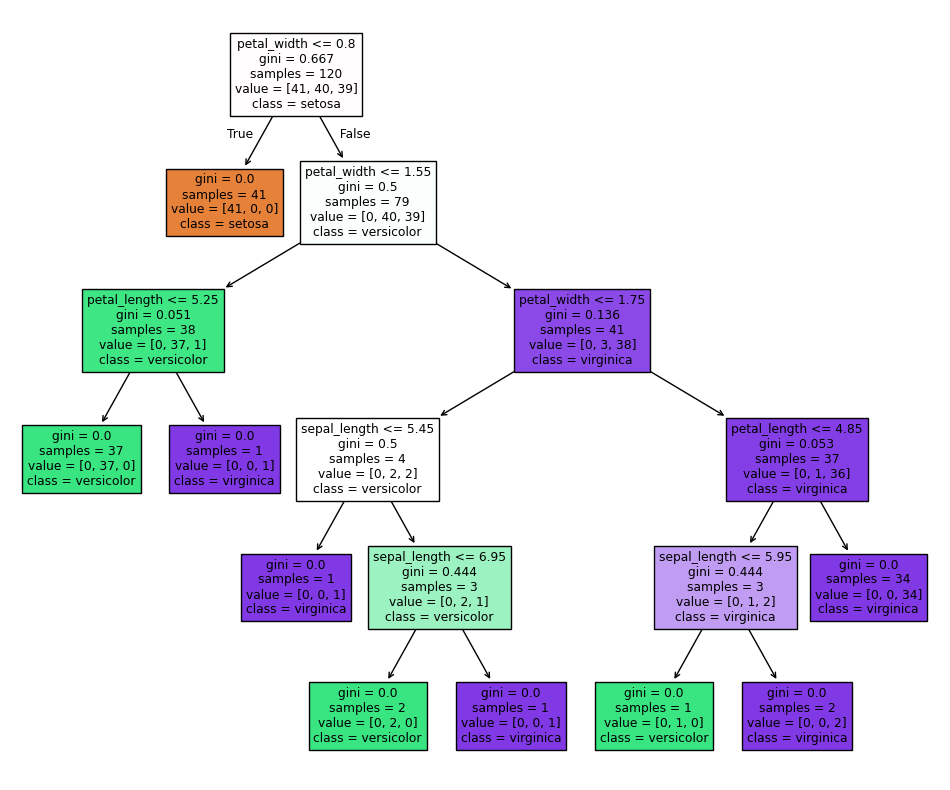

In [53]:
plt.figure(figsize=(12,10))
plot_tree(dmodel,feature_names = feature, class_names = clas ,filled = True)
plt.show()

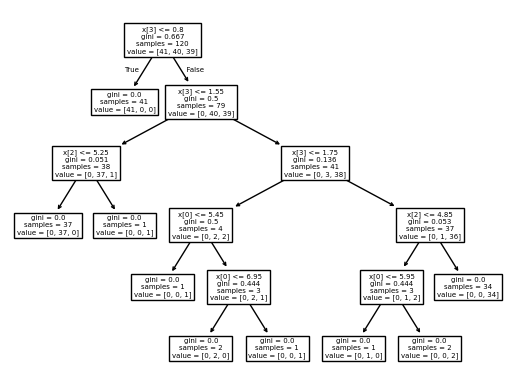

In [43]:
plot_tree(dmodel)
plt.show()

In [ ]:
chhito overfitting hunchhaa=> decison tree ko disadvantage
